In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:

Df_final = pd.read_parquet("data/migrantes.parquet")

## INFORMACION GENERAL DEL DF

In [3]:
Df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563223 entries, 0 to 563222
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   País                    563223 non-null  object
 1   Código ISO país         563223 non-null  object
 2   Ciudad de Residencia    563223 non-null  object
 3   Oficina de registro     563223 non-null  object
 4   Grupo edad              563223 non-null  object
 5   Edad (años)             563223 non-null  int64 
 6   Área Conocimiento       563223 non-null  object
 7   Sub Area Conocimiento   563223 non-null  object
 8   Nivel Académico         563223 non-null  object
 9   Estado civil            563223 non-null  object
 10  Género                  563223 non-null  object
 11  Etnia de la persona     563223 non-null  object
 12  Estatura (CM)           563223 non-null  int64 
 13  Ciudad de Nacimiento    563223 non-null  object
 14  Localización            563223 non-n

In [4]:

print(f'Número de filas: {Df_final.shape[0]}\nNúmero de columnas: {Df_final.shape[1]}')

Número de filas: 563223
Número de columnas: 23


In [5]:
Df_final.describe(include='object')

,País,Código ISO país,Ciudad de Residencia,Oficina de registro,Grupo edad,Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Ciudad de Nacimiento,Localización,Fecha de Registro,pais de origen,departamento de origen,Ciudad de residencia,Estado de residencia,Año de Registro,Hora de Registro
count,563223,563223,563223,563223,563223,563223,563223,563223,563223,563223,563223,563223,563223,563223,563223,563223,563223,563223,563223,563223
unique,4,4,12136,35,7,23,65,8,8,4,8,1709,4,154,1,34,88,9034,13,12
top,ESTADOS UNIDOS,USA,FLORIDA/MIAMI,C. NUEVA YORK,ADULTO,NINGUNA,NINGUNA,NO REGISTRA,CASADO,FEMENINO,OTRO,BOGOTA,"(37.09024, -95.712891)",2018-03,COLOMBIA,CUNDINAMARCA,FLORIDA,MIAMI,2023,03
freq,489764,489764,23194,86606,346990,327593,324868,233894,246005,310238,334997,123271,489764,10513,563223,168290,118357,23256,79183,60910


In [6]:
vbles_numericas = Df_final.select_dtypes(include='number').columns

vbles_numericas

Index(['Edad (años)', 'Estatura (CM)', 'Cantidad de personas'], dtype='object')

## ANALISIS Y VISUALIZACIÓN

Los datos analizados corresponden a personas nacidas en Colombia

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_21568\827970251.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=areas.values / 1000,


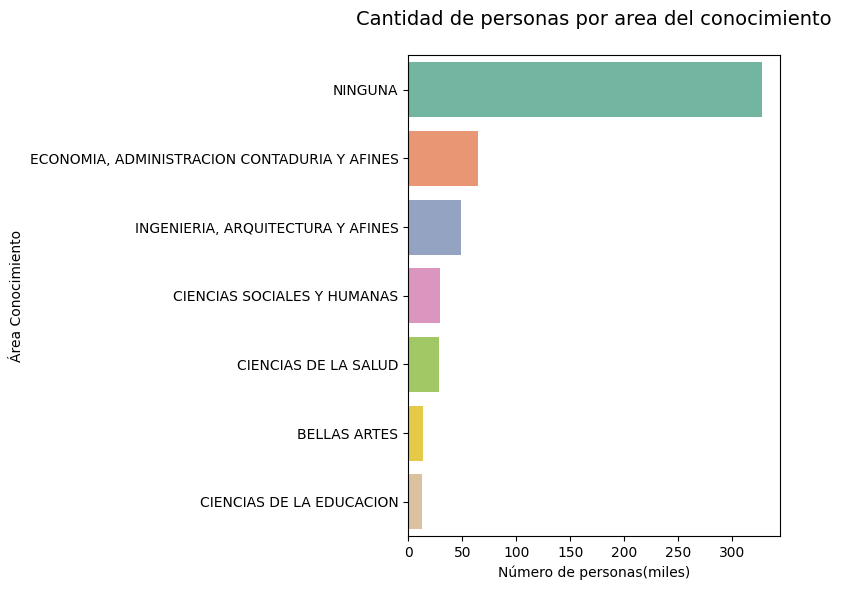

In [7]:
areas = Df_final['Área Conocimiento'].value_counts().sort_values(ascending=False).head(7)


plt.figure(figsize=(8,6))
sns.barplot(x=areas.values / 1000,
            y=areas.index,
            palette='Set2')
plt.title('Cantidad de personas por area del conocimiento\n', fontsize=14)
plt.xlabel('Número de personas(miles)')

plt.tight_layout()
plt.show()

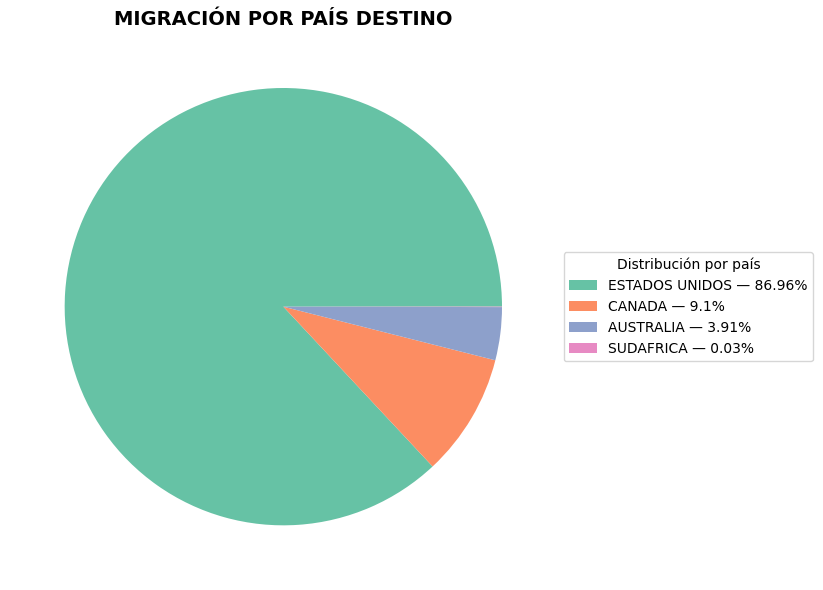

In [8]:

# Conteo de países
Pais = Df_final['País'].value_counts().sort_values(ascending=False)

labels = Pais.index
sizes = Pais.values

# Porcentajes para la leyenda
porcentajes = (sizes / sizes.sum() * 100).round(2)

# Paleta de colores
colors = sns.color_palette("Set2", len(labels))

plt.figure(figsize=(8,6))

# Pie chart limpio (sin texto dentro)
wedges, _ = plt.pie(
    sizes,
    colors=colors,
    labels=None,

)

# LEYENDA con País + %
legend_labels = [f"{labels[i]} — {porcentajes[i]}%" for i in range(len(labels))]
plt.legend(
    wedges,
    legend_labels,
    title="Distribución por país",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("MIGRACIÓN POR PAÍS DESTINO", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

In [9]:
df_gen = Df_final[Df_final['Género'].isin(['FEMENINO', 'MASCULINO'])]

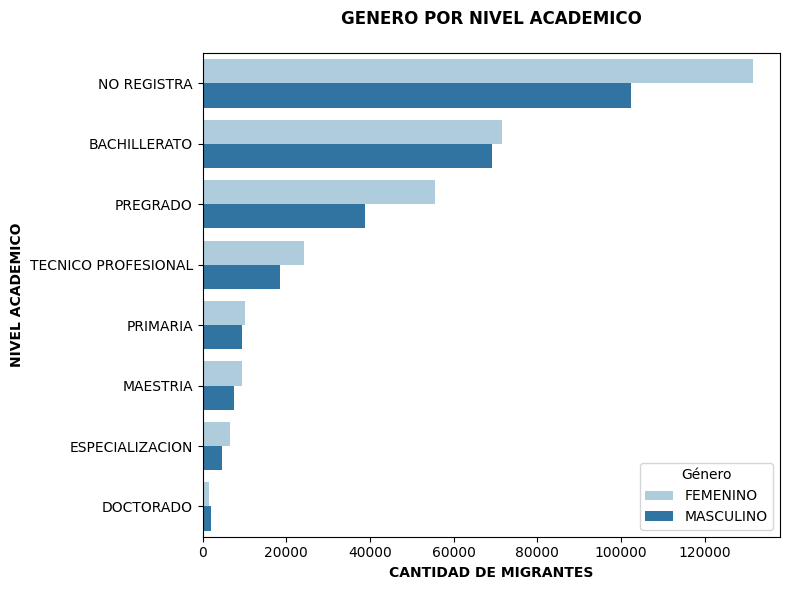

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_gen,
              hue='Género',
              y='Nivel Académico',
              palette= 'Paired',
              order = df_gen['Nivel Académico'].value_counts().index)
plt.title('GENERO POR NIVEL ACADEMICO\n', fontweight='bold')
plt.ylabel('NIVEL ACADEMICO', fontweight='bold')
plt.xlabel('CANTIDAD DE MIGRANTES', fontweight='bold')
plt.tight_layout()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_21568\2132578284.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=departamento.values / 1000,


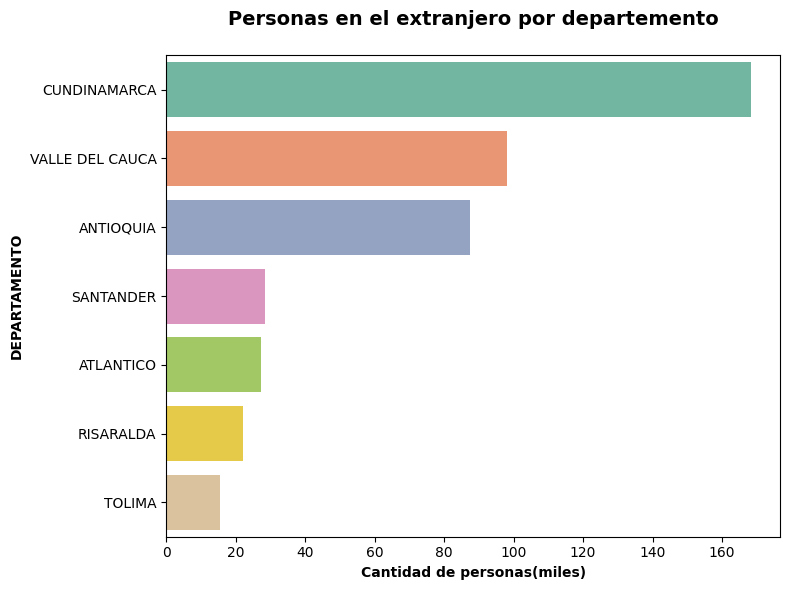

In [11]:
departamento = Df_final['departamento de origen'].value_counts().sort_values(ascending=False).head(7)

plt.figure(figsize=(8,6))
sns.barplot(x=departamento.values / 1000,
            y=departamento.index,
            palette='Set2')
plt.title('Personas en el extranjero por departemento\n', fontsize=14, fontdict={'fontweight':'bold'})
plt.xlabel('Cantidad de personas(miles)', fontweight='bold')
plt.ylabel('DEPARTAMENTO', fontweight='bold')

plt.tight_layout()
plt.show()

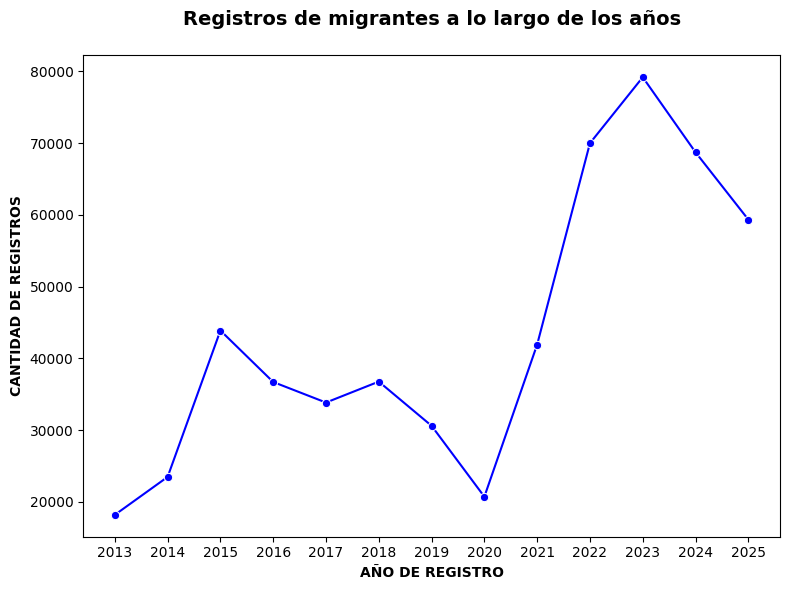

In [12]:
reguistros = Df_final['Año de Registro'].value_counts().sort_index()

plt.figure(figsize=(8,6))
sns.lineplot(x=reguistros.index,
             y=reguistros.values,
             marker='o',
             color='b')
plt.title('Registros de migrantes a lo largo de los años\n', fontsize=14, fontweight='bold')
plt.xlabel('AÑO DE REGISTRO', fontweight='bold')
plt.ylabel('CANTIDAD DE REGISTROS', fontweight='bold')
plt.tight_layout()
plt.show()  

In [13]:

Df_final.columns

Index(['País', 'Código ISO país', 'Ciudad de Residencia',
       'Oficina de registro', 'Grupo edad', 'Edad (años)', 'Área Conocimiento',
       'Sub Area Conocimiento', 'Nivel Académico', 'Estado civil', 'Género',
       'Etnia de la persona', 'Estatura (CM)', 'Ciudad de Nacimiento',
       'Localización', 'Fecha de Registro', 'Cantidad de personas',
       'pais de origen', 'departamento de origen', 'Ciudad de residencia',
       'Estado de residencia', 'Año de Registro', 'Hora de Registro'],
      dtype='object')

In [14]:
df_y = Df_final.groupby('Grupo edad')['departamento de origen'].value_counts().unstack().fillna(0)


In [15]:
df_y['AMAZONAS']

Grupo edad
ADOLESCENTE           1.0
ADULTO              133.0
ADULTO JOVEN         17.0
ADULTO MAYOR         29.0
DESCONOCIDO           0.0
INFANTE               0.0
PRIMERA INFANCIA      0.0
Name: AMAZONAS, dtype: float64

In [16]:
df_y = Df_final.groupby('Etnia de la persona')['País'].value_counts().unstack().fillna(0)

In [17]:
df_y

País,AUSTRALIA,CANADA,ESTADOS UNIDOS,SUDAFRICA
Etnia de la persona,,,,
AFRODESCENDIENTE,182.0,394.0,2852.0,1.0
GITANO,3.0,5.0,108.0,0.0
INDIGENA,34.0,46.0,577.0,0.0
NINGUNA,15192.0,24974.0,171174.0,86.0
OTRO,6169.0,24602.0,304141.0,85.0
PALENQUERO DE SAN BASILIO,1.0,4.0,52.0,0.0
RAIZAL DEL ARCHIPIELAGO DE SAN ANDRES,7.0,12.0,161.0,0.0
SIN ETNIA REGISTRADA,452.0,1209.0,10699.0,1.0


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_21568\1060933695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_y['AUSTRALIA'].values,


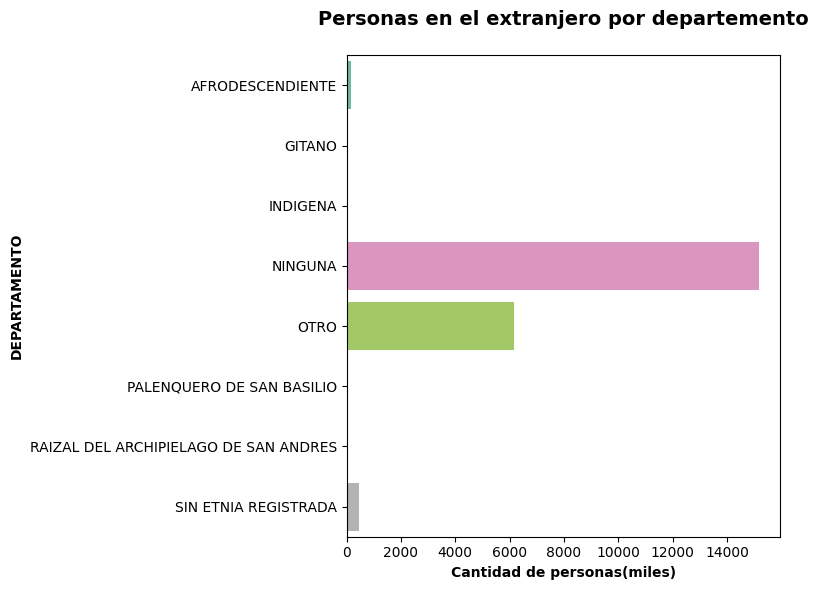

In [18]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_y['AUSTRALIA'].values,
            y=df_y.index,
            palette='Set2')
plt.title('Personas en el extranjero por departemento\n', fontsize=14, fontdict={'fontweight':'bold'})
plt.xlabel('Cantidad de personas(miles)', fontweight='bold')
plt.ylabel('DEPARTAMENTO', fontweight='bold')

plt.tight_layout()
plt.show()

In [19]:
areas = Df_final['Área Conocimiento'].value_counts().sort_values(ascending=False).head(7)

In [20]:
subareas = Df_final.groupby('Sub Area Conocimiento')['Área Conocimiento'].value_counts().unstack().fillna(0)

In [21]:
filtro = Df_final['Área Conocimiento'] == 'ADMINISTRACION DE EMPRESAS Y DERECHO'

admin = Df_final[filtro]

In [22]:
subadmin = admin['Sub Area Conocimiento'].value_counts().sort_values(ascending=False)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_21568\1539645350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subadmin.values / 1000,


Text(0.5, 0, 'Cantidad de personas(miles)')

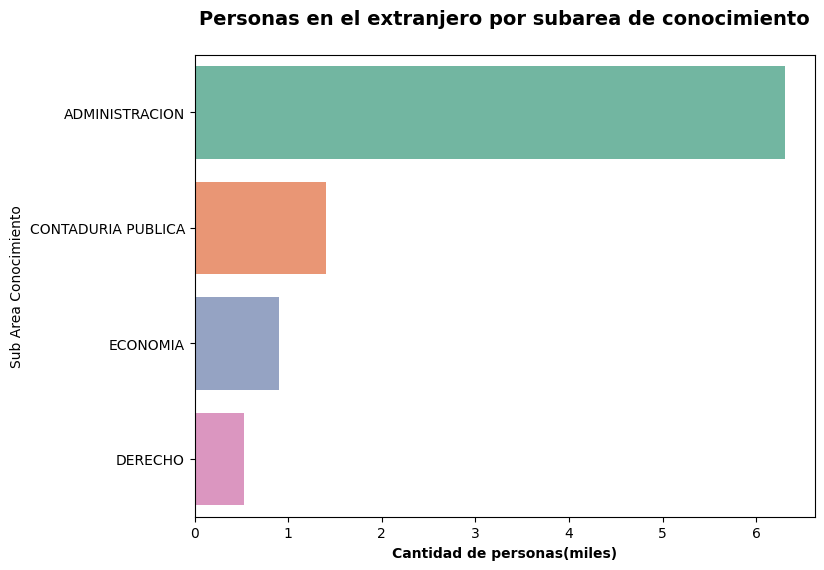

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x=subadmin.values / 1000,   
            y=subadmin.index,
            palette='Set2')         
plt.title('Personas en el extranjero por subarea de conocimiento\n', fontsize=14, fontdict={'fontweight':'bold'})
plt.xlabel('Cantidad de personas(miles)', fontweight='bold')

Text(0.5, 0, 'Nivel Académico')

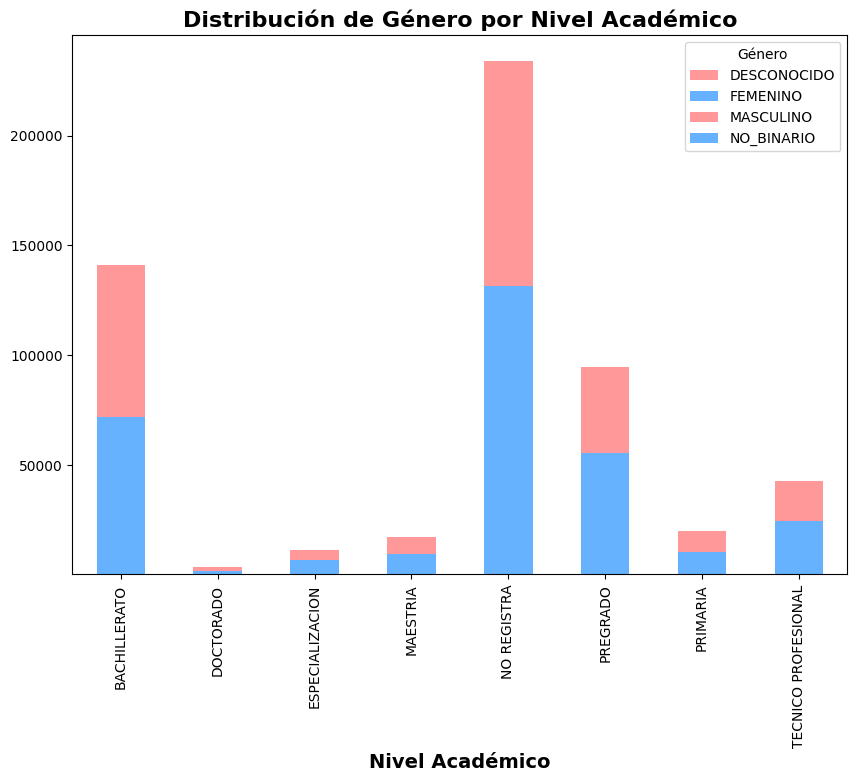

In [24]:
nivel_genero = Df_final.groupby('Nivel Académico')['Género'].value_counts().unstack().fillna(0).plot.bar(stacked=True, figsize=(10,7), color=['#FF9999','#66B2FF'])
plt.title('Distribución de Género por Nivel Académico', fontsize=16, fontweight='bold')
plt.xlabel('Nivel Académico', fontsize=14, fontweight='bold')                

In [25]:
#modelos para la app
df_pais = Df_final.groupby('País')['Etnia de la persona'].value_counts().unstack().fillna(0)
display(df_pais)

condicion = Df_final['País'] == 'AUSTRALIA'
df_pais = Df_final[condicion]

df_region = df_pais.groupby('Estado de residencia')['Etnia de la persona'].value_counts().unstack().fillna(0)
display(df_region)


Etnia de la persona,AFRODESCENDIENTE,GITANO,INDIGENA,NINGUNA,OTRO,PALENQUERO DE SAN BASILIO,RAIZAL DEL ARCHIPIELAGO DE SAN ANDRES,SIN ETNIA REGISTRADA
País,,,,,,,,
AUSTRALIA,182.0,3.0,34.0,15192.0,6169.0,1.0,7.0,452.0
CANADA,394.0,5.0,46.0,24974.0,24602.0,4.0,12.0,1209.0
ESTADOS UNIDOS,2852.0,108.0,577.0,171174.0,304141.0,52.0,161.0,10699.0
SUDAFRICA,1.0,0.0,0.0,86.0,85.0,0.0,0.0,1.0


Etnia de la persona,AFRODESCENDIENTE,GITANO,INDIGENA,NINGUNA,OTRO,PALENQUERO DE SAN BASILIO,RAIZAL DEL ARCHIPIELAGO DE SAN ANDRES,SIN ETNIA REGISTRADA
Estado de residencia,,,,,,,,
ABBOTSFORD,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
ADELAIDA,4.0,0.0,0.0,51.0,34.0,0.0,0.0,1.0
ADELAIDE,9.0,0.0,1.0,719.0,235.0,0.0,1.0,15.0
ADELAIDE LEAD,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
ALBANY,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
YARRA JUNCTION,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
YARRAVILLE,0.0,0.0,0.0,7.0,1.0,0.0,0.0,1.0
YEPPOON,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
#para indicadores de migracion
indicadores_de_migracion = [(reguistros.values[i+1] - reguistros.values[i])*100/reguistros.values[i] for i in range(len(reguistros.values)-1)]

In [40]:
años = np.arange(2013,2025,1)
df_indicadores = pd.DataFrame(años, indicadores_de_migracion).round(2)

11
